<a href="https://colab.research.google.com/github/manish-4007/Movie-Recommender/blob/main/Movie_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/drive/MyDrive//project/Movie Recommender/TMDB_MovieDateset.csv')
data

,id,title,release_date,popularity,vote_average,vote_count
0,507086,Jurassic World Dominion,01/06/2022,2594.003,6.8,303
1,361743,Top Gun: Maverick,24/05/2022,973.262,8.3,905
2,420821,Chip 'n Dale: Rescue Rangers,18/05/2022,1029.579,7.1,490
3,532710,Firestarter,12/05/2022,61.275,6.2,229
4,785985,The Takedown,06/05/2022,1121.840,5.9,217
...,...,...,...,...,...,...
6398,19384,Dark Angel,26/01/1990,10.398,6.0,206
6399,2469,Tie Me Up! Tie Me Down!,22/01/1990,10.830,6.9,471
6400,9362,Tremors,19/01/1990,31.047,6.8,2557
6401,37770,Fantozzi to the Rescue,15/01/1990,7.092,6.0,305


In [ ]:
ratings = pd.DataFrame(data.groupby('title')['vote_average'].mean())
ratings

,vote_average
title,
'71,6.8
(500) Days of Summer,7.3
10 Cloverfield Lane,7.0
10 Things I Hate About You,7.5
100 Meters,7.5
...,...
eXistenZ,6.8
iBoy,6.0
mid90s,7.5


In [ ]:
mov_df = data[['id','title','popularity','vote_count']]
mov_df=mov_df.merge(ratings,on='title')
mov_df

,id,title,popularity,vote_count,vote_average
0,507086,Jurassic World Dominion,2594.003,303,6.8
1,361743,Top Gun: Maverick,973.262,905,8.3
2,420821,Chip 'n Dale: Rescue Rangers,1029.579,490,7.1
3,532710,Firestarter,61.275,229,6.2
4,785985,The Takedown,1121.840,217,5.9
...,...,...,...,...,...
6398,19384,Dark Angel,10.398,206,6.0
6399,2469,Tie Me Up! Tie Me Down!,10.830,471,6.9
6400,9362,Tremors,31.047,2557,6.8
6401,37770,Fantozzi to the Rescue,7.092,305,6.0


In [ ]:
rating_popular_books = mov_df.query('vote_count >=400')
popular_books = rating_popular_books.query('popularity >= 10')
popular_books.shape

(3690, 5)

In [ ]:
mov_df.groupby('title').count()['vote_average']>0

title
'71                           True
(500) Days of Summer          True
10 Cloverfield Lane           True
10 Things I Hate About You    True
100 Meters                    True
                              ... 
eXistenZ                      True
iBoy                          True
mid90s                        True
mother!                       True
tick, tick... BOOM!           True
Name: vote_average, Length: 6300, dtype: bool

##EDA

<Axes: >

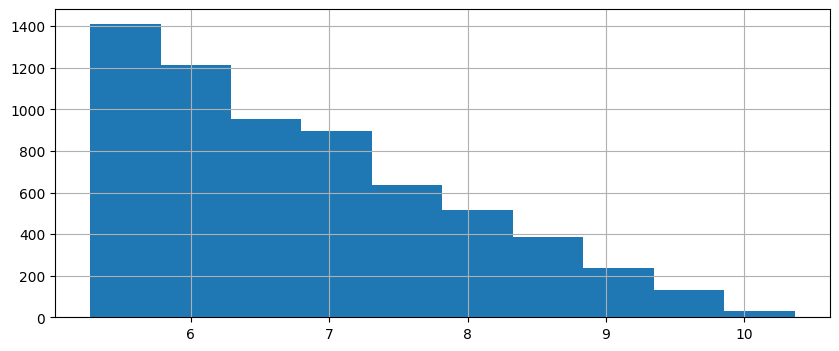

In [ ]:
plt.figure(figsize=(10,4))
np.log(data['vote_count']).hist()

<Axes: >

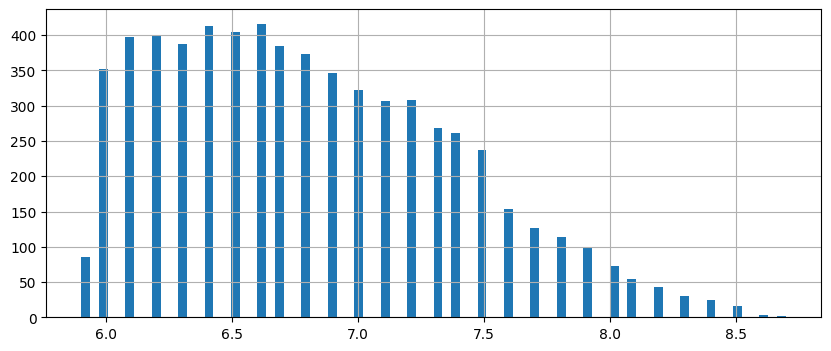

In [ ]:
plt.figure(figsize=(10,4))
data['vote_average'].hist(bins = 80)

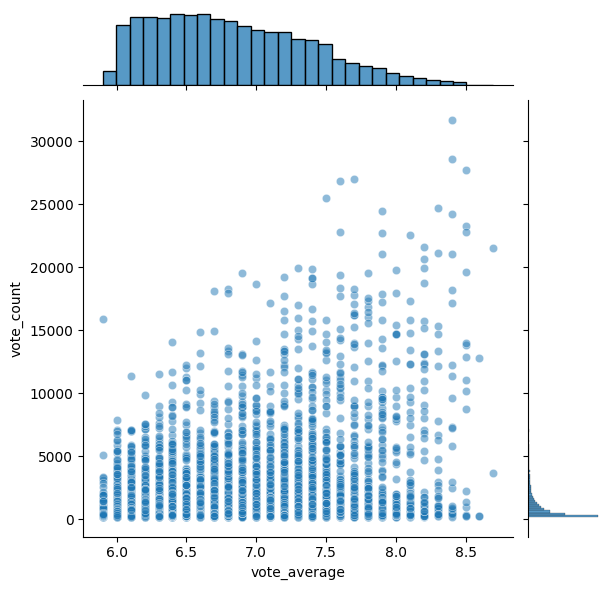

In [ ]:
sns.jointplot(x='vote_average',y='vote_count',data=data,alpha=0.5)

##Collaborative recommondation Model

In [ ]:
moviemat = popular_books.pivot_table(index='title',columns='popularity', values= 'vote_average')
# moviemat.fillna(0,inplace=True)
moviemat

popularity,10.000,10.008,10.011,10.015,10.016,10.017,10.020,10.022,10.034,10.039,...,1695.419,1890.353,1891.590,2021.959,2195.331,2725.923,3337.369,3513.061,3526.302,4726.670
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians II: Patch's London Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Strong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iBoy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mid90s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.sort_values('vote_average',ascending = False)

,vote_average
title,
Dilwale Dulhania Le Jayenge,8.7
The Shawshank Redemption,8.7
Impossible Things,8.6
Dou kyu sei – Classmates,8.6
Schindler's List,8.6
...,...
Get Him to the Greek,5.9
Ghosts of Girlfriends Past,5.9
Gloria Bell,5.9


In [ ]:
starwars_user_ratings = moviemat.loc['The Shawshank Redemption']
# liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

popularity
10.000    0.0
10.008    0.0
10.011    0.0
10.015    0.0
10.016    0.0
Name: The Shawshank Redemption, dtype: float64

In [ ]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
# similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

popularity
10.000      False
10.008      False
10.011      False
10.015      False
10.016      False
            ...  
2725.923    False
3337.369    False
3513.061    False
3526.302    False
4726.670    False
Length: 3487, dtype: bool

In [ ]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars

,Correlation
popularity,


In [ ]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
popularity,


In [ ]:
corr_starwars = corr_starwars.join(mov_df['vote_count'])
corr_starwars.head()

,Correlation,vote_count
popularity,,


In [ ]:
corr_starwars[corr_starwars['vote_count']>100].sort_values('Correlation',ascending=False).head()

In [ ]:
def recommedn_movie(movie):
  movie_user_ratings = moviemat[movie]
  similar_to_movie = moviemat.corrwith(movie_user_ratings)
  corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
  corr_movie.dropna(inplace=True)
  corr_movie = corr_movie.join(ratings['vote_count'])
  corr_movie[corr_movie['vote_count']>100].sort_values('Correlation',ascending=False).head()



In [ ]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_score = cosine_similarity(moviemat)

In [ ]:
similarity_score.shape

(3649, 3649)

In [ ]:
def recommend_movie(movie):
    index = np.where(moviemat.index==movie)[0][0]
    popular_movies = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:11]

    for i in popular_movies:
        print(moviemat.index[i[0]])

In [ ]:
recommend_movie('Avengers: Infinity War')

(500) Days of Summer
10 Cloverfield Lane
10 Things I Hate About You
101 Dalmatians II: Patch's London Adventure
12 Strong
12 Years a Slave
127 Hours
13 Assassins
13 Going on 30
13 Hours: The Secret Soldiers of Benghazi
